## 3- Handling Structural Errors

Structural errors are those that arise during measurement, data transfer, or other types of poor housekeeping, such as: 
  - Data Type Conversion
  - Syntax Errors (Remove white spaces)
  - Fix Typos

In [178]:
import pandas as pd

In [179]:
# Import the dataset
df_titanic = pd.read_csv("https://raw.githubusercontent.com/GMarde/Data-Files/main/titanic_train_se.csv")

In [180]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.28,C85,C
2,3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.93,NaN,S
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.10,C123,S
4,5,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,"Montvila, Rev. Juozas",male,27.0,0,0,211536,$13,NaN,S
887,888,1,First,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,$30,B42,S
888,889,0,Third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,$23.45,NaN,S
889,890,1,First,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,$30,C148,C


In [181]:
# Remove irrelevant columns
df_titanic.drop(["Name","Ticket"],inplace=True,axis=1)

In [182]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,Third,male,22.0,1,0,$7.25,NaN,S
1,2,1,First,female,38.0,1,0,$71.28,C85,C
2,3,1,Third,female,26.0,0,0,$7.93,NaN,S
3,4,1,First,female,35.0,1,0,$53.10,C123,S
4,5,0,Third,male,35.0,0,0,$8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,male,27.0,0,0,$13,NaN,S
887,888,1,First,female,19.0,0,0,$30,B42,S
888,889,0,Third,female,NaN,1,2,$23.45,NaN,S
889,890,1,First,male,26.0,0,0,$30,C148,C


### Data Type Conversion

In [183]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare            object
Cabin           object
Embarked        object
dtype: object

In [184]:
# Lets calculate the mean value of Fare
#df_titanic.Fare.mean()
# When we run this code, it returns an error. 
# We can see that Fare data type is "object". We need to change the data type to float.

In [185]:
## We will replace the dtype "object" to "float"
df_titanic["Fare"] = df_titanic.Fare.str.replace("$","").astype(float)

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_8628\2783564081.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_titanic["Fare"] = df_titanic.Fare.str.replace("$","").astype(float)


In [186]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [187]:
df_titanic.Fare

0       7.25
1      71.28
2       7.93
3      53.10
4       8.05
       ...  
886    13.00
887    30.00
888    23.45
889    30.00
890     7.75
Name: Fare, Length: 891, dtype: float64

In [188]:
# Calculating the mean value of Fare
df_titanic.Fare.mean()

32.20501683501681

### Syntax Errors

#### Remove White Spaces
Extra white spaces at the beginning or the end of a string should be removed.

In [189]:
import pandas as pd
df = pd.DataFrame({
    'company_code': ['Abcd','EFGF ',' fhygy','abcd',' '],
    'date_of_sale ': ['12/05/2002','16/02/1999','25/09/1998','12/02/2022','15/09/1997'],
    'sale_amount': [12348.5, 233331.2, 22.5, 2566552.0, 23.0]})

In [190]:
df

,company_code,date_of_sale,sale_amount
0,Abcd,12/05/2002,12348.5
1,EFGF,16/02/1999,233331.2
2,fhygy,25/09/1998,22.5
3,abcd,12/02/2022,2566552.0
4,,15/09/1997,23.0


In [191]:
print("Original DataFrame:")
print(df)
print("\nIs space is present?")
# Check if the string ends with a white space
#df['company_code_is_title'] = list(map(lambda x: x.endswith(" "), df['company_code']))
# Check if the string start with a white space
#df['company_code_is_title'] = list(map(lambda x: x.startswith(" "), df['company_code']))
# strip : Remove spaces at the beginning and at the end of the string:
df['company_code_new'] = list(map(lambda x: x.strip(), df['company_code']))
print(df)

Original DataFrame:
  company_code date_of_sale   sale_amount
0         Abcd    12/05/2002      12348.5
1        EFGF     16/02/1999     233331.2
2        fhygy    25/09/1998         22.5
3         abcd    12/02/2022    2566552.0
4                 15/09/1997         23.0

Is space is present?
  company_code date_of_sale   sale_amount company_code_new
0         Abcd    12/05/2002      12348.5             Abcd
1        EFGF     16/02/1999     233331.2             EFGF
2        fhygy    25/09/1998         22.5            fhygy
3         abcd    12/02/2022    2566552.0             abcd
4                 15/09/1997         23.0                 


In [192]:
df

,company_code,date_of_sale,sale_amount,company_code_new
0,Abcd,12/05/2002,12348.5,Abcd
1,EFGF,16/02/1999,233331.2,EFGF
2,fhygy,25/09/1998,22.5,fhygy
3,abcd,12/02/2022,2566552.0,abcd
4,,15/09/1997,23.0,


#### Lets apply on Titanic Dataset

In [193]:
'''Creating a new column with bolean values to check if it has white spaces in the beggining or in the end'''

# Check if the string *ends* with a white space
df_titanic["Sex_r"] = list(map(lambda x:x.endswith(" "),df_titanic["Sex"]))

In [194]:
# Check if the string *starts* with a white space
df_titanic["Sex_l"] = list(map(lambda x:x.startswith(" "),df_titanic["Sex"]))

In [195]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_r,Sex_l
0,1,0,Third,male,22.0,1,0,7.25,NaN,S,False,True
1,2,1,First,female,38.0,1,0,71.28,C85,C,False,False
2,3,1,Third,female,26.0,0,0,7.93,NaN,S,False,False
3,4,1,First,female,35.0,1,0,53.10,C123,S,False,False
4,5,0,Third,male,35.0,0,0,8.05,NaN,S,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,male,27.0,0,0,13.00,NaN,S,False,False
887,888,1,First,female,19.0,0,0,30.00,B42,S,False,False
888,889,0,Third,female,NaN,1,2,23.45,NaN,S,False,False
889,890,1,First,male,26.0,0,0,30.00,C148,C,False,False


In [196]:
# Show columns starting with space
print(df_titanic[df_titanic["Sex_l"] == True])

     PassengerId  Survived  Pclass       Sex   Age  SibSp  Parch    Fare  \
0              1         0   Third      male  22.0      1      0    7.25   
8              9         1   Third    female  27.0      0      2   11.13   
13            14         0   Third      male  39.0      1      5   31.28   
31            32         1   First    female   NaN      1      0  146.52   
48            49         0   Third      male   NaN      2      0   21.68   
63            64         0   Third      male   4.0      3      2   27.90   
79            80         1   Third    female  30.0      0      0   12.48   
128          129         1   Third    female   NaN      1      1   22.36   
157          158         0   Third      male  30.0      0      0    8.05   
172          173         1   Third    female   1.0      1      1   11.13   
204          205         1   Third      male  18.0      0      0    8.05   
252          253         0   First      male  62.0      0      0   26.55   
277         

In [197]:
# Show columns ending with space
print(df_titanic[df_titanic["Sex_r"] == True])

     PassengerId  Survived  Pclass       Sex   Age  SibSp  Parch   Fare Cabin  \
342          343         0  Second     male   28.0      0      0  13.00   NaN   
343          344         0  Second     male   25.0      0      0  13.00   NaN   
345          346         1  Second   female   24.0      0      0  13.00   F33   
349          350         0   Third     male   42.0      0      0   8.66   NaN   
354          355         0   Third     male    NaN      0      0   7.23   NaN   
374          375         0   Third   female    3.0      3      1  21.08   NaN   
376          377         1   Third   female   22.0      0      0   7.25   NaN   

    Embarked  Sex_r  Sex_l  
342        S   True  False  
343        S   True  False  
345        S   True  False  
349        S   True   True  
354        C   True  False  
374        S   True   True  
376        S   True   True  


In [198]:
# Removing the new columns we just created
df_titanic.drop(["Sex_r","Sex_l"],inplace=True,axis=1)

In [199]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,Third,male,22.0,1,0,7.25,NaN,S
1,2,1,First,female,38.0,1,0,71.28,C85,C
2,3,1,Third,female,26.0,0,0,7.93,NaN,S
3,4,1,First,female,35.0,1,0,53.10,C123,S
4,5,0,Third,male,35.0,0,0,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,male,27.0,0,0,13.00,NaN,S
887,888,1,First,female,19.0,0,0,30.00,B42,S
888,889,0,Third,female,NaN,1,2,23.45,NaN,S
889,890,1,First,male,26.0,0,0,30.00,C148,C


In [200]:
# Creating a new column with the sex values, now withwith the spaces in the beggining and in the end

df_titanic["Sex_New"] = list(map(lambda x: x.strip(), df_titanic['Sex']))
print(df_titanic)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch   Fare Cabin  \
0              1         0   Third    male  22.0      1      0   7.25   NaN   
1              2         1   First  female  38.0      1      0  71.28   C85   
2              3         1   Third  female  26.0      0      0   7.93   NaN   
3              4         1   First  female  35.0      1      0  53.10  C123   
4              5         0   Third    male  35.0      0      0   8.05   NaN   
..           ...       ...     ...     ...   ...    ...    ...    ...   ...   
886          887         0  Second    male  27.0      0      0  13.00   NaN   
887          888         1   First  female  19.0      0      0  30.00   B42   
888          889         0   Third  female   NaN      1      2  23.45   NaN   
889          890         1   First    male  26.0      0      0  30.00  C148   
890          891         0   Third    male  32.0      0      0   7.75   NaN   

    Embarked Sex_New  
0          S    male  
1    

#### Fix typos and incorrent inputs
When we collect the raw data we can observe that same type of string values are stored in many different ways.
We need to recognize these values in the dataset.

In [201]:
# Lets check whether each value in the dataset below is male or female.
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_New
0,1,0,Third,male,22.0,1,0,7.25,NaN,S,male
1,2,1,First,female,38.0,1,0,71.28,C85,C,female
2,3,1,Third,female,26.0,0,0,7.93,NaN,S,female
3,4,1,First,female,35.0,1,0,53.10,C123,S,female
4,5,0,Third,male,35.0,0,0,8.05,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,male,27.0,0,0,13.00,NaN,S,male
887,888,1,First,female,19.0,0,0,30.00,B42,S,female
888,889,0,Third,female,NaN,1,2,23.45,NaN,S,female
889,890,1,First,male,26.0,0,0,30.00,C148,C,male


In [202]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Sex_New', ylabel='count'>

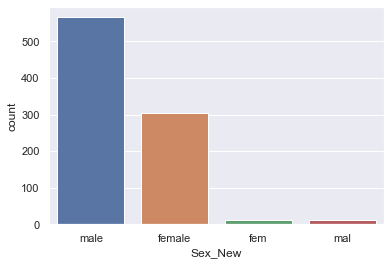

In [203]:
sns.set(style="darkgrid")
sns.countplot(x = "Sex_New",data = df_titanic)

In [204]:
df_titanic['Sex_New'].value_counts()

male      566
female    303
fem        11
mal        11
Name: Sex_New, dtype: int64

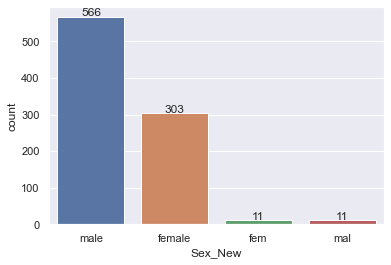

891 Total number of rows


In [205]:
ax = sns.countplot(x="Sex_New", data=df_titanic)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height), # Total value
            #'{:1.2f}'.format(height/total), # Percentage
            ha="center") 
plt.show()
print(int(len(df_titanic)), "Total number of rows")

We can see in graph that there are 4 classes, but ideally there should be only 2 clases.
- "fem" should be "female"
- "mal" should be "male"

In [206]:
# Lets manually map each value to either "male" or "female"
df_titanic["Sex_New"] = df_titanic["Sex_New"].map({"fem":"female","mal":"male","male":"male","female":"female"})

<AxesSubplot:xlabel='Sex_New', ylabel='count'>

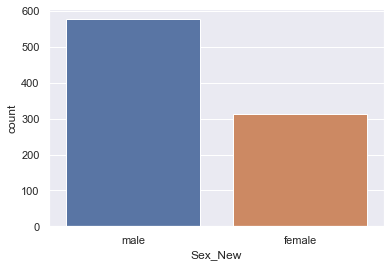

In [207]:
sns.countplot(x = "Sex_New",data = df_titanic)

In [208]:
df_titanic['Sex_New'].value_counts()

male      577
female    314
Name: Sex_New, dtype: int64

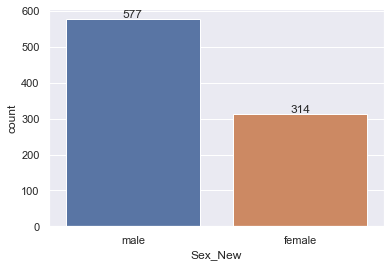

891 Total number of rows


In [209]:
ax = sns.countplot(x="Sex_New", data=df_titanic)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height), # Total value
            #'{:1.2f}'.format(height/total), # Percentage
            ha="center") 
plt.show()
print(int(len(df_titanic)), "Total number of rows")